#Titanic Passenger Purvival Prediction using logistic regression.

##Library imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

##Loading and Data Preprocessing

In [5]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')  # Replace with the actual path to your dataset

# Data preprocessing
# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

##Feature Engineering and Selecton

In [6]:
# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch']

# Select relevant features for modeling
features = ['Pclass', 'Age', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

#EDA and Visualization

         Survived      Pclass         Age       SibSp       Parch    Sex_male  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.361582    0.523008    0.381594    0.647587   
std      0.486592    0.836071   13.019697    1.102743    0.806057    0.477990   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    0.000000   
50%      0.000000    3.000000   28.000000    0.000000    0.000000    1.000000   
75%      1.000000    3.000000   35.000000    1.000000    0.000000    1.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000    1.000000   

       Embarked_Q  Embarked_S  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.086420    0.725028    0.904602  
std      0.281141    0.446751    1.613459  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

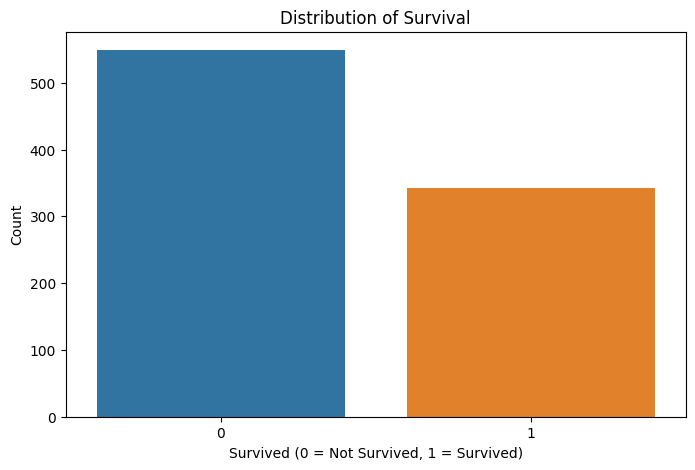

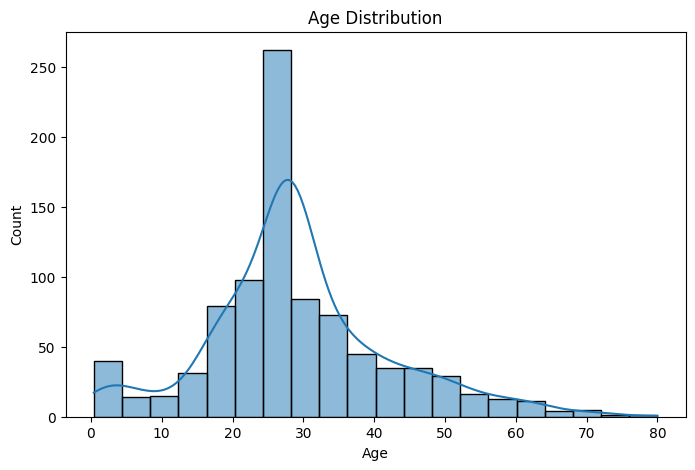

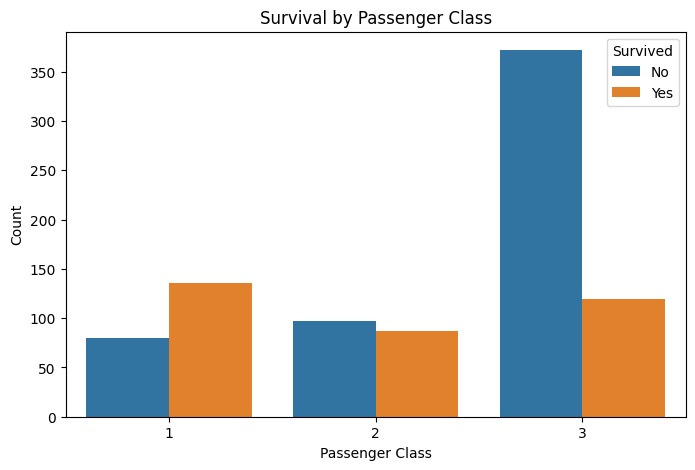

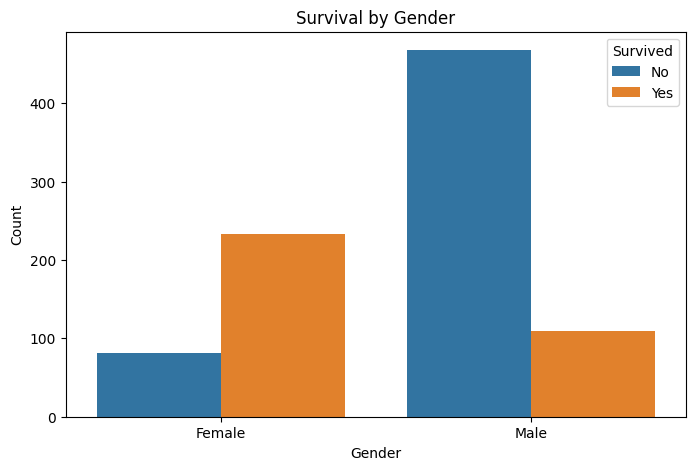

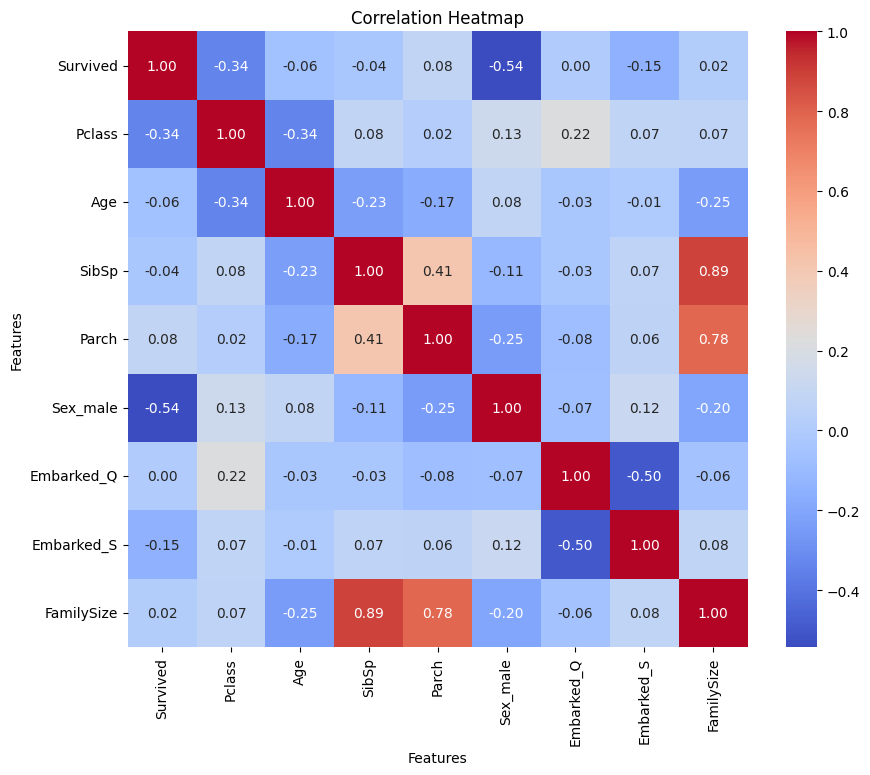

In [7]:
#Some basic statistics
print(data.describe())

# Distribution of survival
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Survived')
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Pclass vs. Survival
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Gender vs. Survival
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sex_male', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

##Logistic Regression

In [8]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

##Model Evaluation

In [9]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.810056

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

